In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from itertools import combinations
import numpy as np
from matplotlib import colors
from matplotlib import ticker
import seaborn as sns
#import prody as pr
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
%matplotlib inline
plt.style.use('seaborn-white')

/tmp/ipykernel_4878/1733444132.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
#from pandas.compat import StringIO

sns.set(style="whitegrid")

In [3]:
import phik
from phik import resources, report

In [4]:
import statsmodels.formula.api as smf

In [5]:
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

In [10]:
import pandas as pd

df = pd.read_excel('/media/roberto/DAE01F61E01F4365/engelbert/TABLA_MATRIZ_Roberto_2023.xlsx')

In [11]:
df.columns=["#","CODIGO","EDAD","GENERO","Estrato socio económico","Progreso a shock séptico","Progreso a neuro sepsis","Presepsin (sCD14) Concentración sérica (ng/ml)","Presepsin (sCD14)Nivel","TLR4 Concentración sérica (ng/ml)"," TLR4Nivel","LPS Concentración sérica (ng/ml)","LPS Nivel","MyD88 Concentración sérica (pg/ml)","MyD88 Nivel"]

In [12]:
df = df.drop(index=[0, 1, 2])

In [13]:
df.columns.tolist()

['#',
 'CODIGO',
 'EDAD',
 'GENERO',
 'Estrato socio económico',
 'Progreso a shock séptico',
 'Progreso a neuro sepsis',
 'Presepsin (sCD14) Concentración sérica (ng/ml)',
 'Presepsin (sCD14)Nivel',
 'TLR4 Concentración sérica (ng/ml)',
 ' TLR4Nivel',
 'LPS Concentración sérica (ng/ml)',
 'LPS Nivel',
 'MyD88 Concentración sérica (pg/ml)',
 'MyD88 Nivel']

In [14]:
selected_columns = [ 'EDAD',
 'GENERO',
 'Estrato socio económico',
 'Progreso a shock séptico',
 'Progreso a neuro sepsis',
 'Presepsin (sCD14) Concentración sérica (ng/ml)',
 'Presepsin (sCD14)Nivel',
 'TLR4 Concentración sérica (ng/ml)',
 ' TLR4Nivel',
 'LPS Concentración sérica (ng/ml)',
 'LPS Nivel',
 'MyD88 Concentración sérica (pg/ml)',
 'MyD88 Nivel']
new_df = df.loc[:, selected_columns]

In [15]:
new_df

,EDAD,GENERO,Estrato socio económico,Progreso a shock séptico,Progreso a neuro sepsis,Presepsin (sCD14) Concentración sérica (ng/ml),Presepsin (sCD14)Nivel,TLR4 Concentración sérica (ng/ml),TLR4Nivel,LPS Concentración sérica (ng/ml),LPS Nivel,MyD88 Concentración sérica (pg/ml),MyD88 Nivel
3,33,M,BAJO,SI,SI,83.3,ELEVADO,53.3,ELEVADO,34.1,ELEVADO,300,NORMAL
4,39,F,BAJO,SI,SI,81.7,ELEVADO,62.7,ELEVADO,46.5,ELEVADO,200,NORMAL
5,28,F,BAJO,SI,SI,74.1,ELEVADO,44.1,ELEVADO,35.4,ELEVADO,3600,ELEVADO
6,28,F,BAJO,NO,NO,8.73,NORMAL,6.43,ELEVADO,37,ELEVADO,400,NORMAL
7,31,F,BAJO,SI,SI,80.9,ELEVADO,70.5,ELEVADO,39.6,ELEVADO,3900,ELEVADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,66,F,BAJO,NO,NO,3.03,NORMAL,8.5,NORMAL,11.3,NORMAL,876,NORMAL
124,87,F,BAJO,NO,NO,8.78,NORMAL,6.45,NORMAL,10.6,NORMAL,209,NORMAL
125,69,M,MEDIO,NO,NO,8.27,NORMAL,27.34,ELEVADO,23.5,ELEVADO,400,NORMAL
126,38,M,BAJO,NO,NO,8.31,NORMAL,9.67,NORMAL,10.5,NORMAL,58,NORMAL


In [16]:
selected_columns =['EDAD','Presepsin (sCD14) Concentración sérica (ng/ml)','TLR4 Concentración sérica (ng/ml)','LPS Concentración sérica (ng/ml)','MyD88 Concentración sérica (pg/ml)']
new_df=new_df.astype({'EDAD':'float','Presepsin (sCD14) Concentración sérica (ng/ml)':'float','TLR4 Concentración sérica (ng/ml)':'float','LPS Concentración sérica (ng/ml)':'float','MyD88 Concentración sérica (pg/ml)':'float'})

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 3 to 127
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EDAD                                            125 non-null    float64
 1   GENERO                                          125 non-null    object 
 2   Estrato socio económico                         125 non-null    object 
 3   Progreso a shock séptico                        125 non-null    object 
 4   Progreso a neuro sepsis                         125 non-null    object 
 5   Presepsin (sCD14) Concentración sérica (ng/ml)  125 non-null    float64
 6   Presepsin (sCD14)Nivel                          125 non-null    object 
 7   TLR4 Concentración sérica (ng/ml)               125 non-null    float64
 8    TLR4Nivel                                      125 non-null    object 
 9   LPS Concentración sérica (ng/ml)           

In [19]:
new_df.columns


Index(['EDAD', 'GENERO', 'Estrato socio económico', 'Progreso a shock séptico',
       'Progreso a neuro sepsis',
       'Presepsin (sCD14) Concentración sérica (ng/ml)',
       'Presepsin (sCD14)Nivel', 'TLR4 Concentración sérica (ng/ml)',
       ' TLR4Nivel', 'LPS Concentración sérica (ng/ml)', 'LPS Nivel',
       'MyD88 Concentración sérica (pg/ml)', 'MyD88 Nivel'],
      dtype='object')

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# defining the table
#data = [[207, 282, 241], [234, 242, 232]]
#stat, p, dof, expected = chi2_contingency(data)
cols = list(new_df.select_dtypes(include=['object']).columns)
cols.append("Progreso a shock séptico")
subset = new_df[cols]

subset

,GENERO,Estrato socio económico,Progreso a shock séptico,Progreso a neuro sepsis,Presepsin (sCD14)Nivel,TLR4Nivel,LPS Nivel,MyD88 Nivel,Progreso a shock séptico
3,M,BAJO,SI,SI,ELEVADO,ELEVADO,ELEVADO,NORMAL,SI
4,F,BAJO,SI,SI,ELEVADO,ELEVADO,ELEVADO,NORMAL,SI
5,F,BAJO,SI,SI,ELEVADO,ELEVADO,ELEVADO,ELEVADO,SI
6,F,BAJO,NO,NO,NORMAL,ELEVADO,ELEVADO,NORMAL,NO
7,F,BAJO,SI,SI,ELEVADO,ELEVADO,ELEVADO,ELEVADO,SI
...,...,...,...,...,...,...,...,...,...
123,F,BAJO,NO,NO,NORMAL,NORMAL,NORMAL,NORMAL,NO
124,F,BAJO,NO,NO,NORMAL,NORMAL,NORMAL,NORMAL,NO
125,M,MEDIO,NO,NO,NORMAL,ELEVADO,ELEVADO,NORMAL,NO
126,M,BAJO,NO,NO,NORMAL,NORMAL,NORMAL,NORMAL,NO


In [40]:
dummy_df = pd.get_dummies(new_df.select_dtypes(include=['object']))


In [51]:
subset = pd.concat([dummy_df, new_df["Progreso a shock séptico"]], axis=1)
subset2 = pd.concat([dummy_df, new_df['Progreso a neuro sepsis']], axis=1)


In [52]:
results = []

for col in dummy_df.columns:
    contingency_table = pd.crosstab(subset[col], subset["Progreso a shock séptico"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append([col, chi2, p, dof, expected])
    

results_df = pd.DataFrame(results, columns=["Column", "Chi-square", "p-value", "Degrees of Freedom", "Expected Frequencies"])

alpha = 0.05 # set alpha level

results_df["Reject Null Hypothesis"] = results_df["p-value"].apply(lambda x: "Dependent (reject H0)" if x <= alpha else "Independent (H0 holds true)")


In [54]:
results3 = []

for col in dummy_df.columns:
    contingency_table2 = pd.crosstab(subset[col], subset2['Progreso a neuro sepsis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table2)
    results3.append([col, chi2, p, dof, expected])
    

results_df3 = pd.DataFrame(results3, columns=["Column", "Chi-square", "p-value", "Degrees of Freedom", "Expected Frequencies"])

alpha = 0.05 # set alpha level

results_df3["Reject Null Hypothesis"] = results_df3["p-value"].apply(lambda x: "Dependent (reject H0)" if x <= alpha else "Independent (H0 holds true)")


In [55]:
results_df3.to_excel("resultados2.xlsx",
             sheet_name='Progreso a neuro sepsis')  
results_df.to_excel("resultados.xlsx",
             sheet_name="Progreso a shock séptico")  

In [44]:
alpha = 0.05 # set alpha level

results_df["Reject Null Hypothesis"] = results_df["p-value"].apply(lambda x: "Dependent (reject H0)" if x <= alpha else "Independent (H0 holds true)")


In [30]:
cols

['GENERO',
 'Estrato socio económico',
 'Progreso a shock séptico',
 'Progreso a neuro sepsis',
 'Presepsin (sCD14)Nivel',
 ' TLR4Nivel',
 'LPS Nivel',
 'MyD88 Nivel',
 'Progreso a shock séptico']

In [37]:
for col in cols:
   print(col) 

GENERO
Estrato socio económico
Progreso a shock séptico
Progreso a neuro sepsis
Presepsin (sCD14)Nivel
 TLR4Nivel
LPS Nivel
MyD88 Nivel
Progreso a shock séptico


In [10]:
new_df = new_df.rename(columns={"EDAD": "EDAD", "Presepsin (sCD14) Concentración sérica (ng/ml)": "P_sCD14",
                        "TLR4 Concentración sérica (ng/ml)": "TLR4", "LPS Concentración sérica (ng/ml)": "LPS_serico",
                        "MyD88 Concentración sérica (pg/ml)": "MyD88"})


In [12]:
new_df["Progreso a shock séptico"]=df["Progreso a shock séptico"]

In [14]:
print(new_df.dtypes)

EDAD                        float64
P_sCD14                     float64
TLR4                        float64
LPS_serico                  float64
MyD88                       float64
Progreso a shock séptico     object
dtype: object


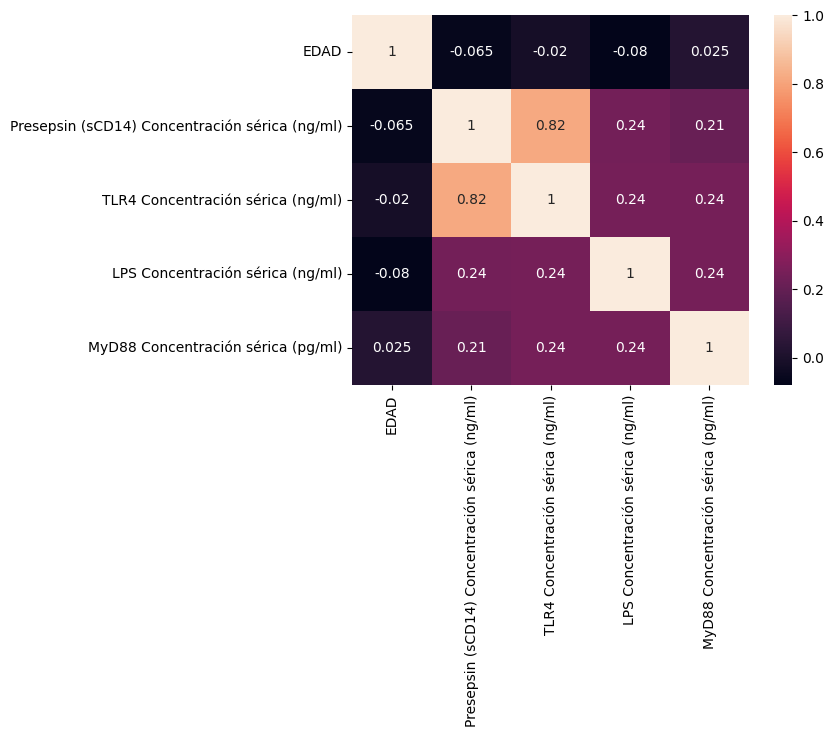

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(new_df.corr(), annot=True)
plt.show()

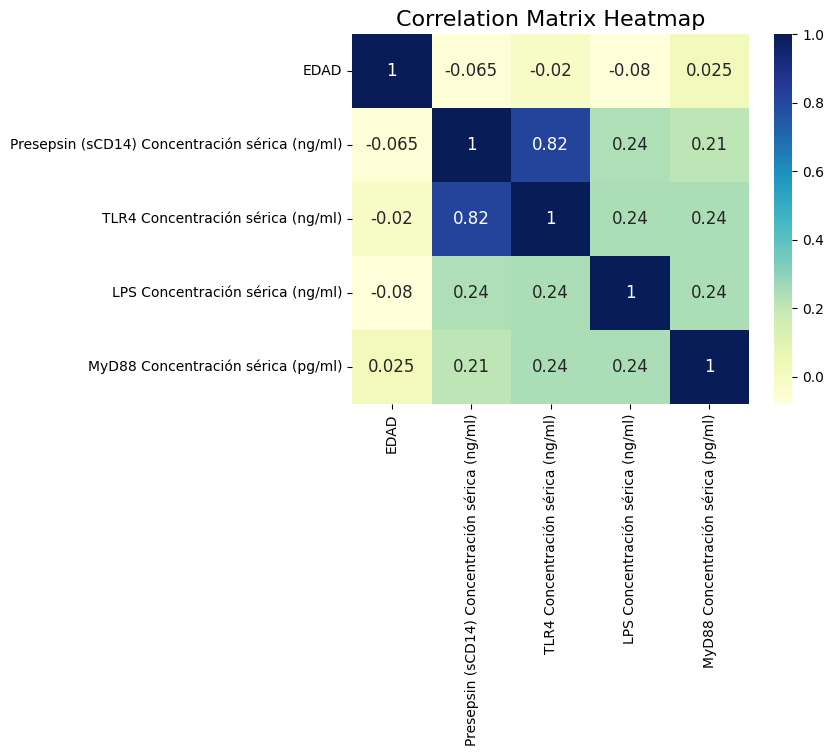

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a heatmap of the correlation matrix of new_df
sns.heatmap(new_df.corr(), annot=True, annot_kws={"fontsize": 12}, cmap="YlGnBu")

# set the title of the plot
plt.title("Correlation Matrix Heatmap", fontsize=16)

# show the plot
plt.show()


In [9]:

print(new_df.describe())

             EDAD  Presepsin (sCD14) Concentración sérica (ng/ml)  \
count  125.000000                                      125.000000   
mean    57.496000                                       20.851200   
std     17.054762                                       16.095493   
min     22.000000                                        3.030000   
25%     43.000000                                        8.610000   
50%     59.000000                                       17.900000   
75%     69.000000                                       28.030000   
max     90.000000                                       83.300000   

       TLR4 Concentración sérica (ng/ml)  LPS Concentración sérica (ng/ml)  \
count                         125.000000                        125.000000   
mean                           20.554320                         27.596800   
std                            15.137911                         18.085357   
min                             3.450000                         1

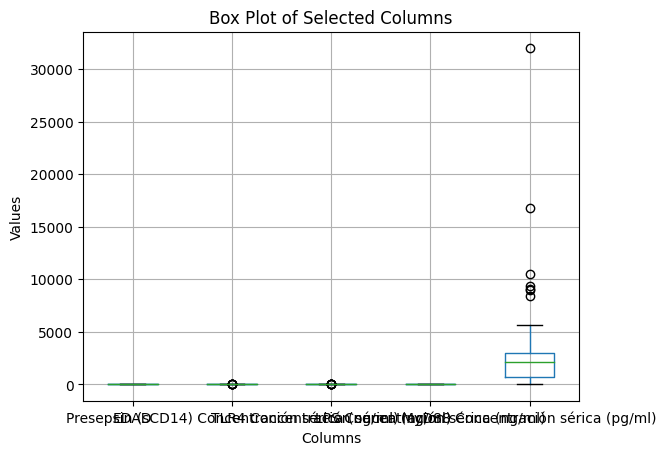

In [26]:
import matplotlib.pyplot as plt
new_df.boxplot()

# set the title and axis labels of the plot
plt.title('Box Plot of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# show the plot
plt.show()

Text(0, 0.5, 'Values')

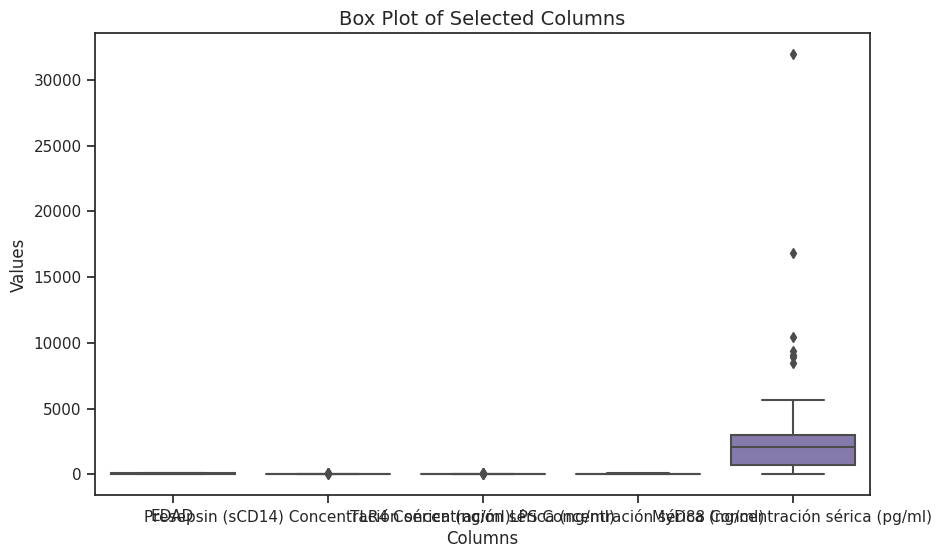

In [27]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=new_df, ax=ax)

# set the title and axis labels of the plot
ax.set_title('Box Plot of Selected Columns', fontsize=14)
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Values', fontsize=12)


In [10]:
# create a new column based on the values of "Progreso a shock séptico"
df["Progreso a shock séptico (SI)"] = df["Progreso a shock séptico"].apply(lambda x: 1 if x == "SI" else 0)
df["Progreso a shock séptico (NO)"] = df["Progreso a shock séptico"].apply(lambda x: 1 if x == "NO" else 0)


In [17]:
df

,EDAD,Presepsin (sCD14) Concentración sérica (ng/ml),TLR4 Concentración sérica (ng/ml),LPS Concentración sérica (ng/ml),MyD88 Concentración sérica (pg/ml),shock
0,43,91,73,82,67,YES
1,37,78,56,58,71,YES
2,76,88,6,30,69,YES
3,22,82,26,70,41,YES
4,74,35,49,50,83,YES
...,...,...,...,...,...,...
95,5,73,86,47,59,NO
96,69,92,65,10,41,NO
97,29,0,77,67,56,NO
98,22,71,75,82,96,NO


In [27]:
df_Progreso_shock_SI=new_df[df["Progreso a shock séptico"]=="SI"]
df_Progreso_shock_NO=new_df[df["Progreso a shock séptico"]=="NO"]

In [28]:
df_Progreso_shock_SI

,EDAD,Presepsin (sCD14) Concentración sérica (ng/ml),TLR4 Concentración sérica (ng/ml),LPS Concentración sérica (ng/ml),MyD88 Concentración sérica (pg/ml)
3,33.0,83.30,53.30,34.1,300.0
4,39.0,81.70,62.70,46.5,200.0
5,28.0,74.10,44.10,35.4,3600.0
7,31.0,80.90,70.50,39.6,3900.0
9,29.0,28.10,18.10,54.0,800.0
29,58.0,19.16,29.30,56.3,4560.0
31,50.0,19.60,29.30,13.2,897.0
33,38.0,18.30,21.65,28.6,4980.0
35,57.0,17.59,21.67,33.7,4560.0
36,78.0,8.61,7.44,11.8,2876.0


Column: value
Kruskal-Wallis test statistic: 0.1576919498942304
P-value: 0.6912904332669736



<AxesSubplot: xlabel='shock', ylabel='value'>

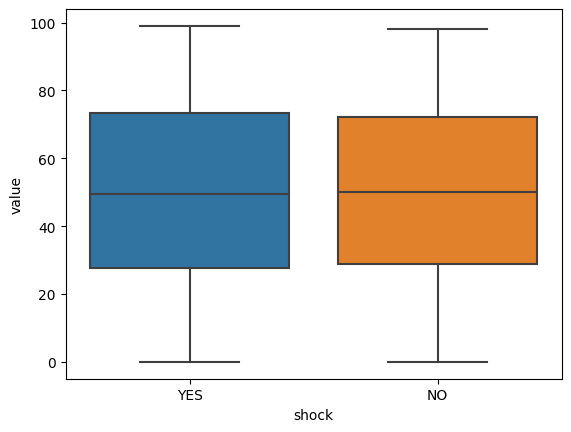

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kruskal

# create the data frames
df_Progreso_shock_YES = pd.DataFrame(np.random.randint(0, 100, size=(100, 1)), columns=["value"])
df_Progreso_shock_NO = pd.DataFrame(np.random.randint(0, 100, size=(100, 1)), columns=["value"])

# combine the data frames into a single data frame
df_teste = pd.concat([df_Progreso_shock_YES.assign(shock="YES"), df_Progreso_shock_NO.assign(shock="NO")])

# perform the Kruskal-Wallis test on each column
for col in df_teste.columns[:-1]:
    k, p = kruskal(df_teste.loc[df_teste["shock"] == "YES", col], df_teste.loc[df_teste["shock"] == "NO", col])
    print(f"Column: {col}\nKruskal-Wallis test statistic: {k}\nP-value: {p}\n")

# create a box plot graph
sns.boxplot(data=df_teste, x="shock", y="value")

Text(0.5, 1.0, 'Progreso a shock séptico')

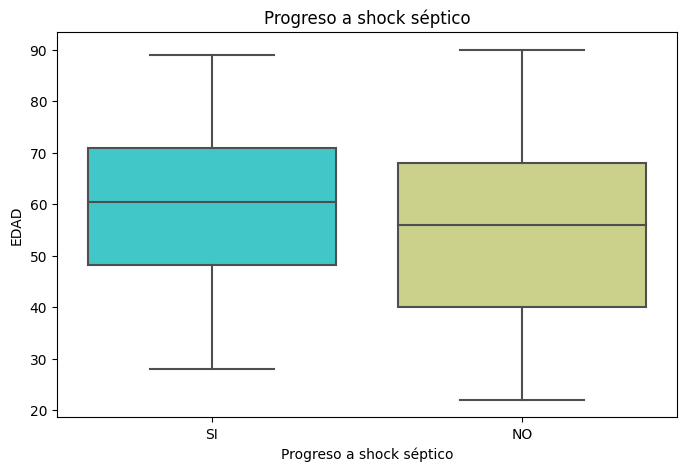

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Progreso a shock séptico",y="EDAD",data=df, palette='rainbow')
plt.title("Progreso a shock séptico")

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class',y='age',hue='survived',data=titanic, palette='rainbow')
sns.swarmplot(x='class',y='age',hue='survived', dodge=True,data=titanic, alpha=.8,color='grey',s=4)
plt.title("Age by Passenger Class, Separated by Survival")

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class',y='age',hue='survived',data=titanic, palette='rainbow')
sns.swarmplot(x='class',y='age',hue='survived', dodge=True,data=titanic, alpha=.8,color='grey',s=4)
plt.title("Age by Passenger Class, Separated by Survival")

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='class',y="age", data=titanic, hue='survived', split='True', palette='rainbow')
sns.swarmplot(x='class',y="age", data=titanic, hue='survived', dodge='True', color='grey', alpha=.8, s=4)
plt.title("Age by Passenger Class, Separated by Survival")

In [ ]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='class', y='age', data=titanic, palette='rainbow')
plt.title("Distribution of Age by Passenger Class")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")
df = sns.load_dataset("tips")

x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [ ]:
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [ ]:
#Apply the chi-square formula:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print('Chi-Square statistic is: ', chi_squared_stat)

In [38]:
k2, p = stats.normaltest(new_df)


alpha = 0.05


columns=new_df.columns

for i in columns:
    print ([i])
    a,b= stats.kstest(new_df[[i]], 'norm')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['EDAD']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['Presepsin (sCD14) Concentración sérica (ng/ml)']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['TLR4 Concentración sérica (ng/ml)']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['LPS Concentración sérica (ng/ml)']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['MyD88 Concentración sérica (pg/ml)']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected


In [39]:
for i in columns:
    print ([i])
    a,b= stats.shapiro(new_df[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['EDAD']
Statistics 0.9709419012069702 p-value 0.008508827537298203
The null hypothesis can be rejected
['Presepsin (sCD14) Concentración sérica (ng/ml)']
Statistics 0.7792675495147705 p-value 1.9739108351318757e-12
The null hypothesis can be rejected
['TLR4 Concentración sérica (ng/ml)']
Statistics 0.824281632900238 p-value 6.509399963494644e-11
The null hypothesis can be rejected
['LPS Concentración sérica (ng/ml)']
Statistics 0.8414912223815918 p-value 2.904603224607172e-10
The null hypothesis can be rejected
['MyD88 Concentración sérica (pg/ml)']
Statistics 0.5617511868476868 p-value 1.136171614266496e-17
The null hypothesis can be rejected


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.970e-02 U_stat=2.202e+03


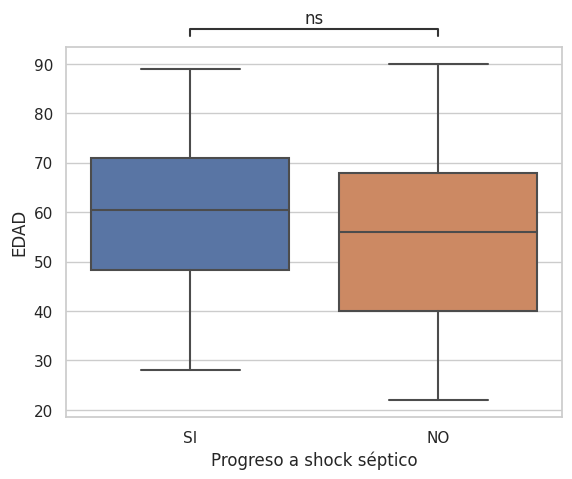

In [43]:

ax = sns.boxplot( x=df["Progreso a shock séptico"], y=new_df['EDAD'])
ax, test_results = add_stat_annotation(ax, x=df["Progreso a shock séptico"], y=new_df['EDAD'], 
                                   
                                   box_pairs=[('SI', 'NO')],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('EDAD.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.970e-02 U_stat=2.202e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.819e-14 U_stat=3.377e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.737e-09 U_stat=3.038e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Ma

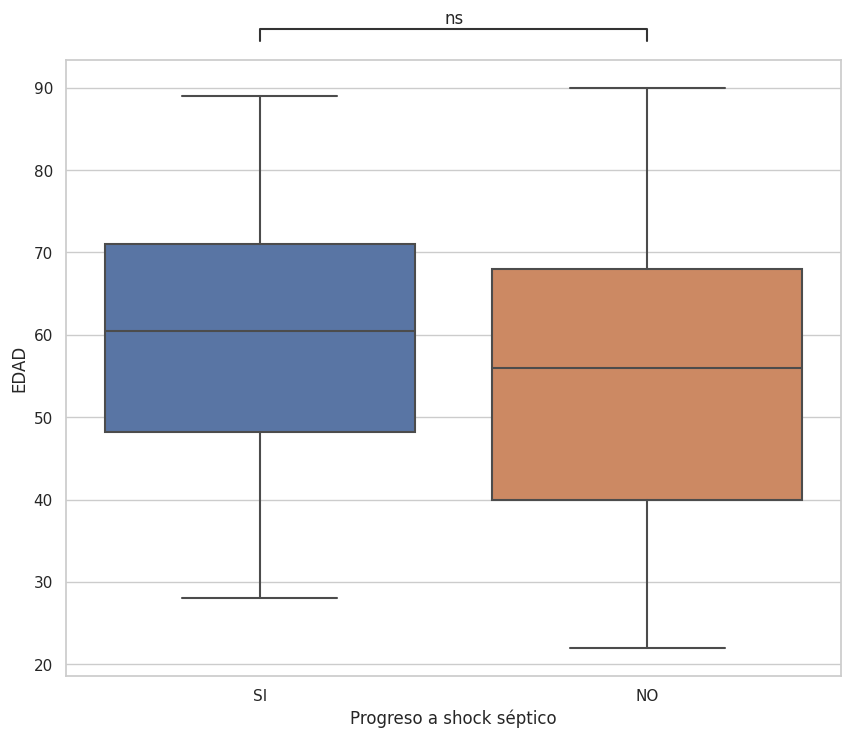

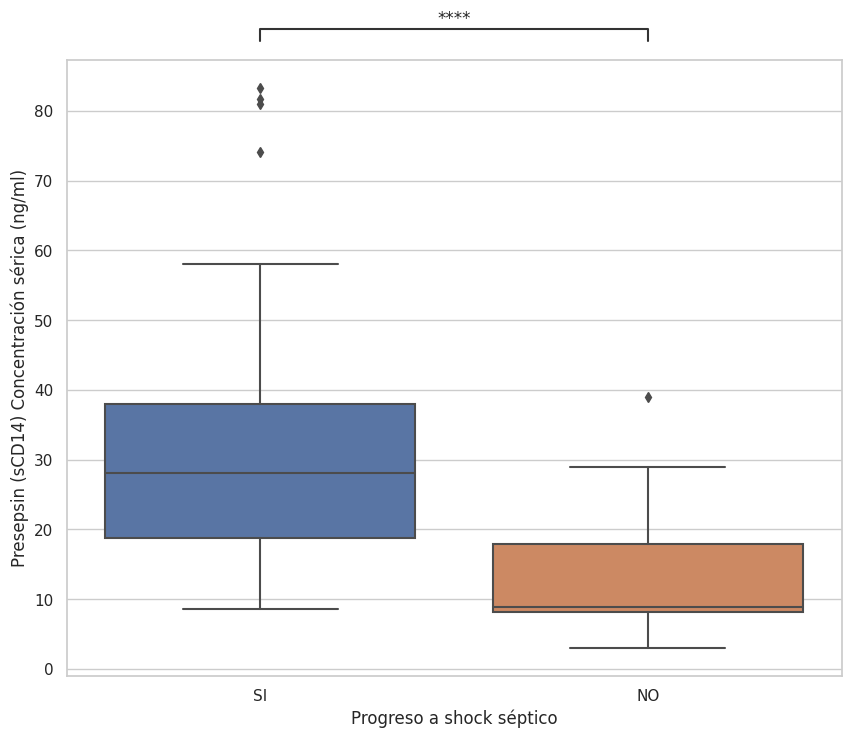

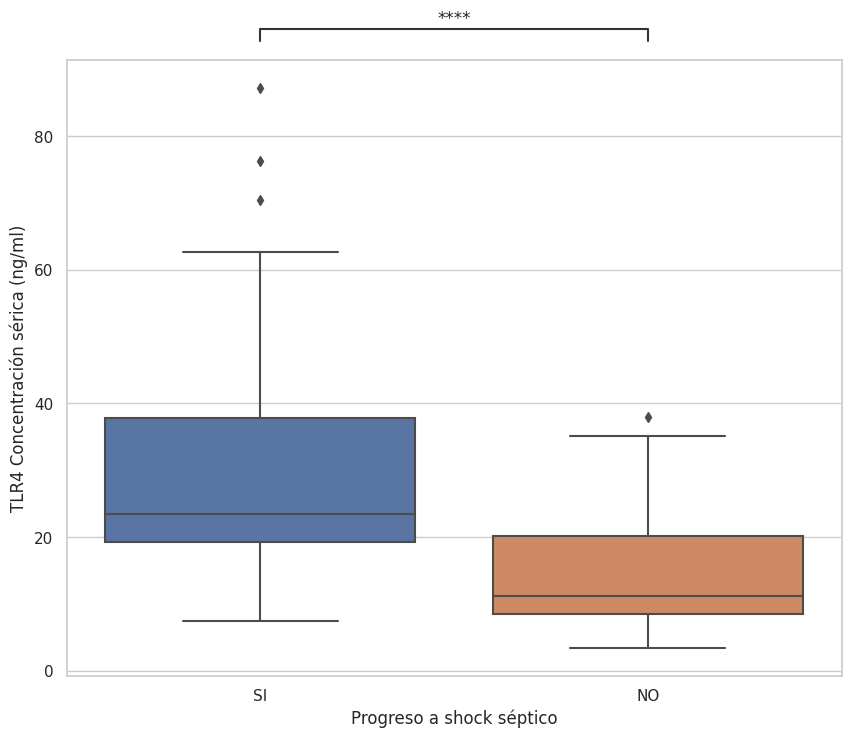

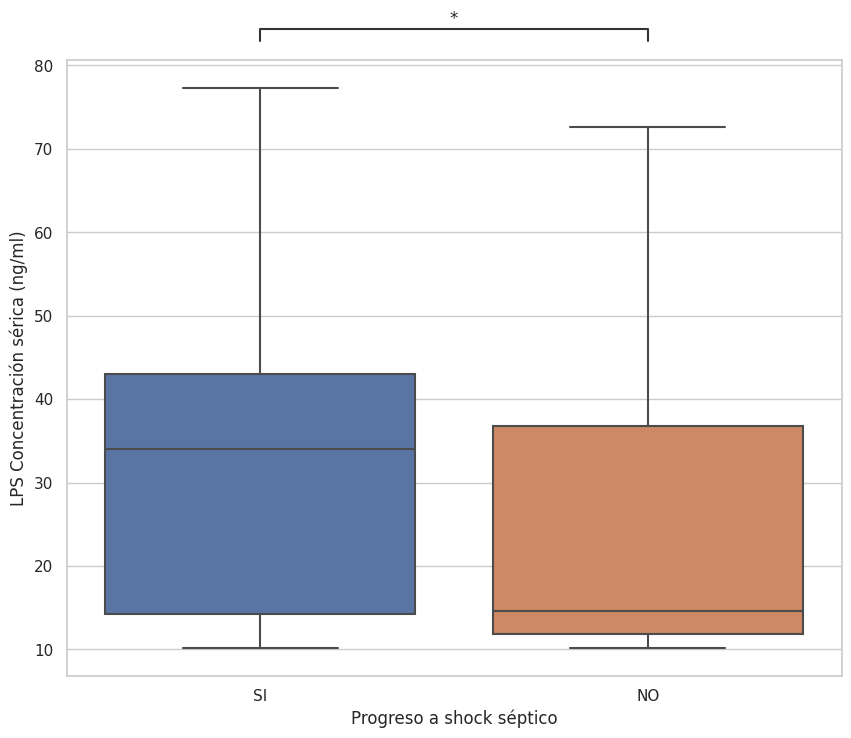

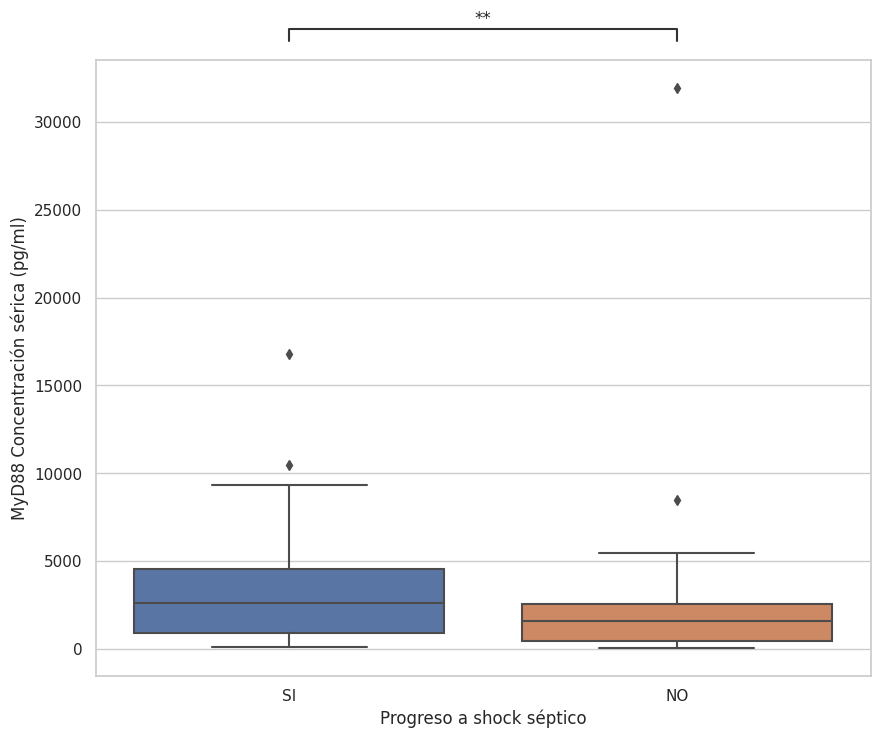

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

variables = ["EDAD", "Presepsin (sCD14) Concentración sérica (ng/ml)", 
             "TLR4 Concentración sérica (ng/ml)", "LPS Concentración sérica (ng/ml)", 
             "MyD88 Concentración sérica (pg/ml)"]
dataframe = new_df #Reemplaza "tu_dataframe" por el nombre de tu dataframe

for variable in variables:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df["Progreso a shock séptico"], y=dataframe[variable])
    ax.set_xlabel("Progreso a shock séptico")
    ax.set_ylabel(variable)
    box_pairs = [("SI", "NO")]
    test_results = add_stat_annotation(ax=ax, x=df["Progreso a shock séptico"], 
                                        y=dataframe[variable], box_pairs=box_pairs, 
                                        test="Mann-Whitney", text_format="star", loc="outside", 
                                        verbose=2)
    #plt.savefig(f"{variable}.png", dpi=300, bbox_inches="tight")

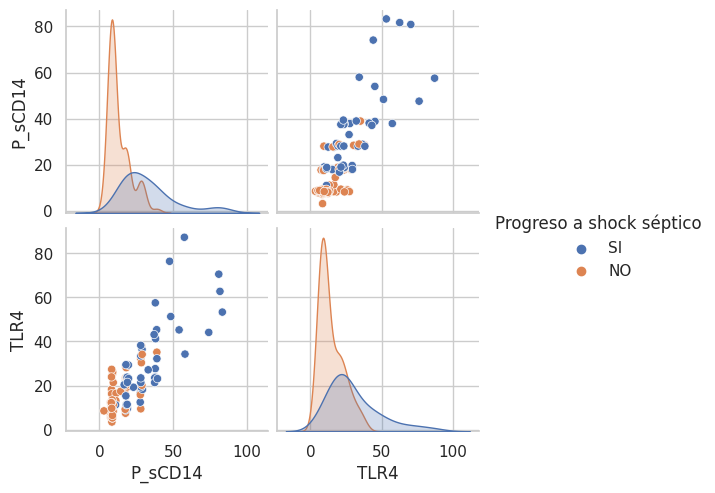

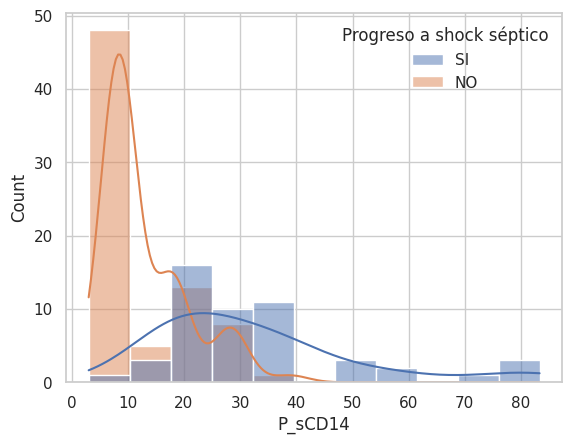

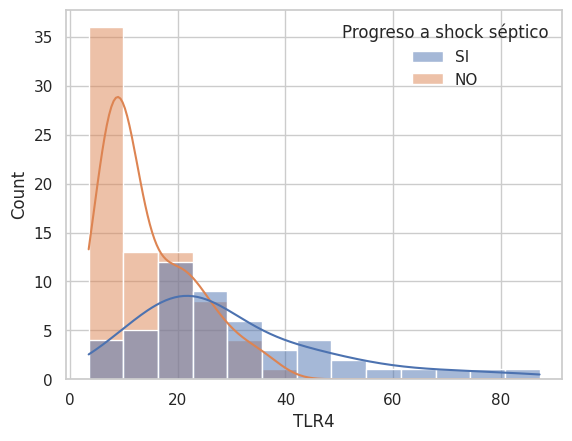

In [28]:
import seaborn as sns

# obtener los coeficientes de la regresión logística
coef = pd.DataFrame(lr.coef_, columns=X_train.columns)
coef = coef.abs().T.sort_values(by=0, ascending=False)

# seleccionar las variables más importantes
top_vars = coef.head(2).index.tolist()

# crear gráfico de pares con las variables más importantes
sns.pairplot(new_df, vars=top_vars, hue="Progreso a shock séptico")
plt.show()

# crear histogramas con las variables más importantes
for var in top_vars:
    sns.histplot(new_df, x=var, hue="Progreso a shock séptico", kde=True)
    plt.show()


In [ ]:
https://colab.research.google.com/github/diannekrouse/LRPython/blob/master/LogisticRegression.ipynb

In [56]:
variables=new_df.select_dtypes(include=['float64'])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.086e-01 U_stat=6.710e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.785e-06 U_stat=1.368e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.168e-05 U_stat=1.309e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI v.s. NO: Ma

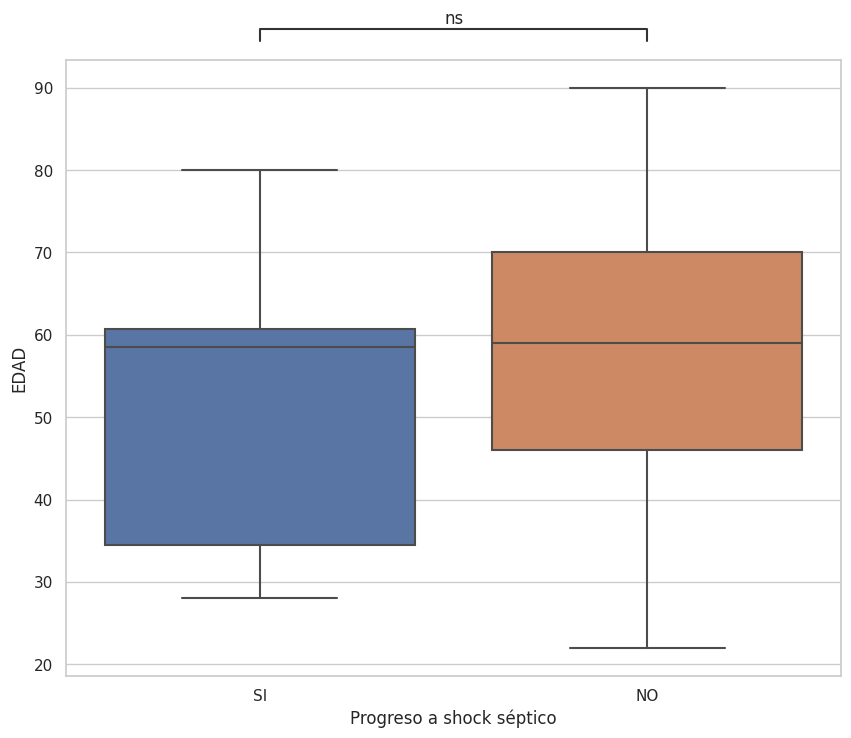

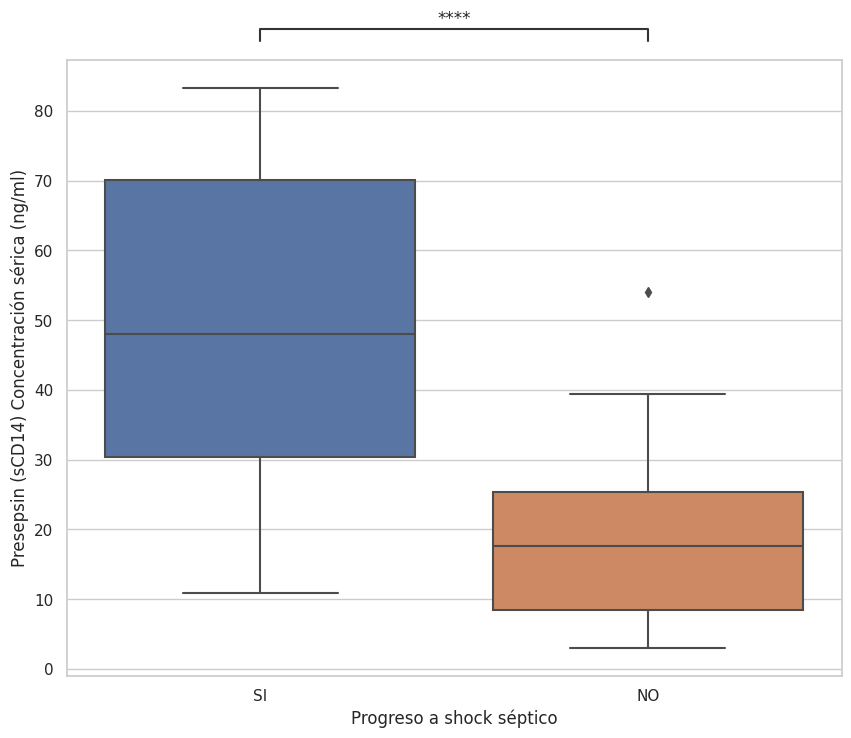

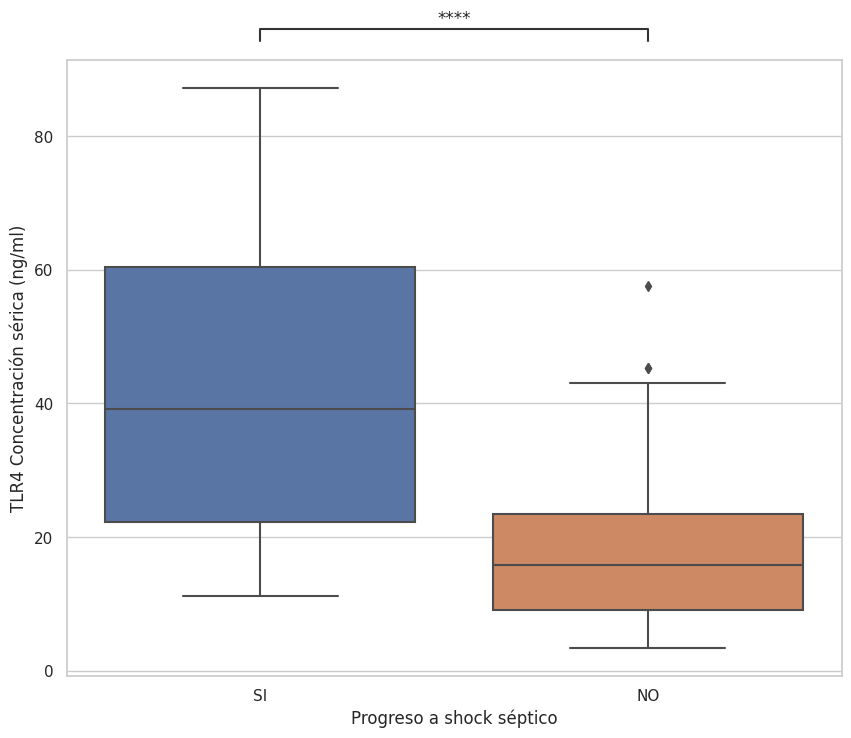

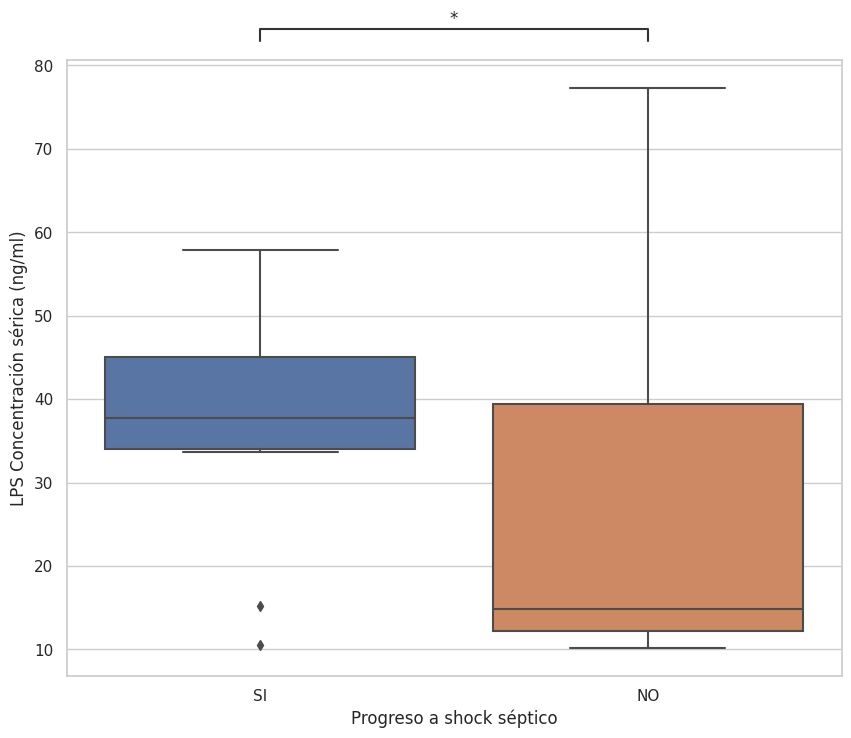

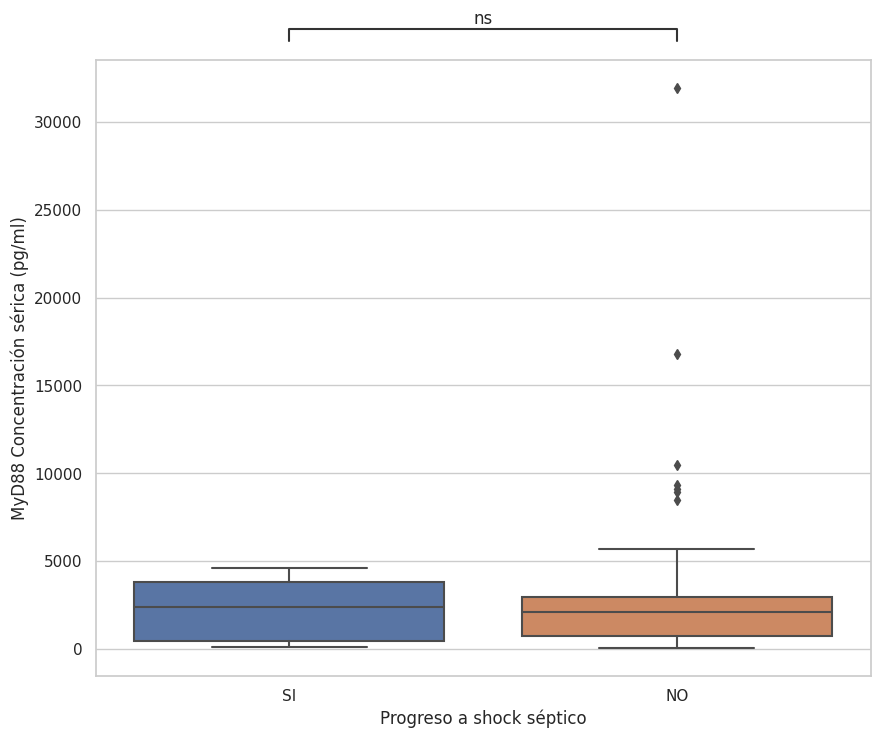

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

variables = ['EDAD', 'Presepsin (sCD14) Concentración sérica (ng/ml)',
       'TLR4 Concentración sérica (ng/ml)', 'LPS Concentración sérica (ng/ml)',
       'MyD88 Concentración sérica (pg/ml)']
dataframe = new_df #Reemplaza "tu_dataframe" por el nombre de tu dataframe

for variable in variables:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df['Progreso a neuro sepsis'], y=dataframe[variable])
    ax.set_xlabel("Progreso a shock séptico")
    ax.set_ylabel(variable)
    box_pairs = [("SI", "NO")]
    test_results = add_stat_annotation(ax=ax, x=df['Progreso a neuro sepsis'], 
                                        y=dataframe[variable], box_pairs=box_pairs, 
                                        test="Mann-Whitney", text_format="star", loc="outside", 
                                        verbose=2)
    #plt.savefig(f"{variable}.png", dpi=300, bbox_inches="tight")

    #plt.savefig(f"{variable}.png", dpi=300, bbox_inches="tight")


In [58]:
variables.columns

Index(['EDAD', 'Presepsin (sCD14) Concentración sérica (ng/ml)',
       'TLR4 Concentración sérica (ng/ml)', 'LPS Concentración sérica (ng/ml)',
       'MyD88 Concentración sérica (pg/ml)'],
      dtype='object')

In [61]:
df.columns

Index(['#', 'CODIGO', 'EDAD', 'GENERO', 'Estrato socio económico',
       'Progreso a shock séptico', 'Progreso a neuro sepsis',
       'Presepsin (sCD14) Concentración sérica (ng/ml)',
       'Presepsin (sCD14)Nivel', 'TLR4 Concentración sérica (ng/ml)',
       ' TLR4Nivel', 'LPS Concentración sérica (ng/ml)', 'LPS Nivel',
       'MyD88 Concentración sérica (pg/ml)', 'MyD88 Nivel'],
      dtype='object')